# Exercise 10.1 

# tomato-or-apple with custom loss function

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls

gdrive	sample_data


In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Datasets
#Check the present working directory using pwd command

/content/gdrive/My Drive/Datasets


In [4]:
!ls

apple-or-tomato


In [5]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from keras import backend as K
import tensorflow as tf
from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization,Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
import scipy.misc

In [7]:
training_data = []
img_size = 100
assign_dict = {"apple":0, "tomato":1}
directory = "/content/gdrive/My Drive/Datasets/apple-or-tomato/training_set"
for sub_directory in os.listdir(directory):
    if sub_directory == "apple":
        inner_directory = os.path.join(directory,sub_directory)
        for i in os.listdir(inner_directory):
            try:
                img = plt.imread(os.path.join(inner_directory,i),1)
                training_data.append([img,assign_dict[sub_directory]])
            except:
                pass
    if sub_directory == "tomato":
        inner_directory = os.path.join(directory,sub_directory)
        for i in os.listdir(inner_directory):
            try:
                img = plt.imread(os.path.join(inner_directory,i),1)
                training_data.append([img,assign_dict[sub_directory]])
            except:
                pass
random.shuffle(training_data)

In [11]:
print(training_data[0])

[array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]

In [12]:
len(training_data)

1300

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


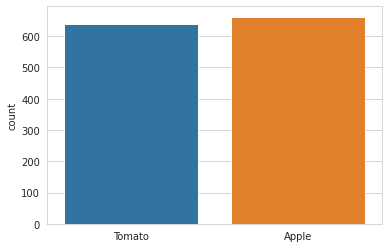

In [13]:
sns.set_style('whitegrid')
f = []
for fruit in training_data:
    if(fruit[1] == 0):
        f.append("Apple")
    else:
        f.append("Tomato")
sns.countplot(f);

In [14]:
testing_data = []
img_size = 100
assign_dict = {"apple":0, "tomato":1}
directory = "/content/gdrive/My Drive/Datasets/apple-or-tomato/test_set"
for sub_directory in os.listdir(directory):
    if sub_directory == "apple":
        inner_directory = os.path.join(directory,sub_directory)
        for i in os.listdir(inner_directory):
            try:
                img = plt.imread(os.path.join(inner_directory,i),1)
                testing_data.append([img,assign_dict[sub_directory]])
            except:
                pass
    if sub_directory == "tomato":
        inner_directory = os.path.join(directory,sub_directory)
        for i in os.listdir(inner_directory):
            try:
                img = plt.imread(os.path.join(inner_directory,i),1)
                testing_data.append([img,assign_dict[sub_directory]])
            except:
                pass

In [15]:
len(testing_data)

648

In [16]:
X_train = []
y_train = []
for features,label in training_data:
    X_train.append(features)
    y_train.append(label)

In [17]:
X_train = np.array(X_train)/255.0
X_train = X_train.reshape(-1,100,100,3)
y_train = np.array(y_train)

In [18]:
X_test = []
y_test = []
for features,label in testing_data:
    X_test.append(features)
    y_test.append(label)

In [19]:
X_test = np.array(X_test)/255.0
X_test = X_test.reshape(-1,100,100,3)
y_test = np.array(y_test)

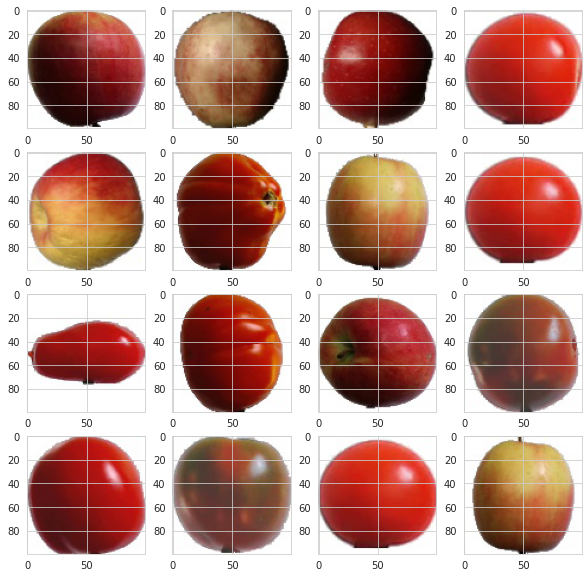

In [20]:
w=10
h=10
fig=plt.figure(figsize=(10,10))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img = X_train[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.squeeze(img))
plt.show()

In [21]:
# custom loss here
# https://neptune.ai/blog/keras-loss-functions


def custom_loss_function(y_true, y_pred):
   print("y_pred ",y_pred)
   print("y_true ", y_true)
   squared_difference = tf.square(float(y_true)-float(y_pred))
   return tf.reduce_mean(squared_difference, axis=-1)
 #  model.compile(optimizer='adam', loss=custom_loss_function)

In [22]:
def relu_batchnorm_layer(input):
    return BatchNormalization()(ReLU()(input))

In [23]:
def residual_block(input, downsample: bool, filters: int, kernel_size: int = 3):
    int_output = Conv2D(filters=filters, kernel_size=kernel_size, 
                        strides= (1 if not downsample else 2), 
                        padding="same")(input)
    int_output = relu_batchnorm_layer(int_output)
    int_output = Conv2D(filters=filters, kernel_size=kernel_size, 
                        padding="same")(int_output)

    if downsample:
        int_output2 = Conv2D(filters=filters, kernel_size=1, strides=2,
                             padding="same")(input)
        output = Add()([int_output2, int_output]) 
    else:
        output = Add()([input, int_output])

    output = relu_batchnorm_layer(output)
    return output

In [24]:
inputs = Input(shape=(100, 100, 3))
num_filters = 32
    
t = BatchNormalization()(inputs)
t = Conv2D(kernel_size=3,
           strides=1,
           filters=32,
           padding="same")(t)
t = relu_batchnorm_layer(t)
    
num_blocks_list = [1, 3, 5, 6, 1]
for i in range(len(num_blocks_list)):
    num_blocks = num_blocks_list[i]
    for j in range(num_blocks):
        t = residual_block(t, downsample=(j==0 and i!=0), filters=num_filters)
    num_filters *= 2
    
t = AveragePooling2D(4)(t)
t = Flatten()(t)
outputs = Dense(1, activation='sigmoid')(t)
    
model = Model(inputs, outputs)

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 100, 100, 3)  12          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 100, 100, 32) 896         batch_normalization[0][0]        
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 100, 100, 32) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [26]:
model.compile(
        optimizer='adam',
        loss=custom_loss_function,
        metrics=['accuracy']
    )

In [27]:
print(tf.__version__)

2.4.1


In [38]:
history=model.fit(X_train,y_train,batch_size = 32,epochs=10,validation_split = 0.1)

Epoch 1/10
37/37 [==============================] - 3s 95ms/step - loss: 0.0173 - accuracy: 0.9778 - val_loss: 0.0070 - val_accuracy: 0.9923
Epoch 2/10
37/37 [==============================] - 3s 93ms/step - loss: 0.0043 - accuracy: 0.9957 - val_loss: 0.0688 - val_accuracy: 0.9231
Epoch 3/10
37/37 [==============================] - 4s 98ms/step - loss: 0.0013 - accuracy: 0.9983 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 4/10
37/37 [==============================] - 3s 93ms/step - loss: 0.0057 - accuracy: 0.9932 - val_loss: 0.0043 - val_accuracy: 0.9923
Epoch 5/10
37/37 [==============================] - 3s 93ms/step - loss: 0.0101 - accuracy: 0.9889 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 6/10
37/37 [==============================] - 3s 93ms/step - loss: 4.1636e-04 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 0.9923
Epoch 7/10
37/37 [==============================] - 3s 93ms/step - loss: 1.2470e-04 - accuracy: 1.0000 - val_loss: 8.0746e-05 - val_accuracy: 1.0000
E

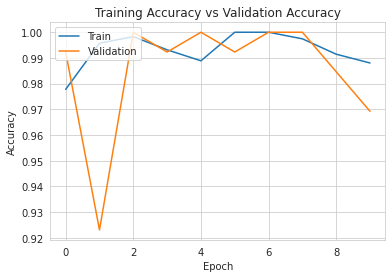

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

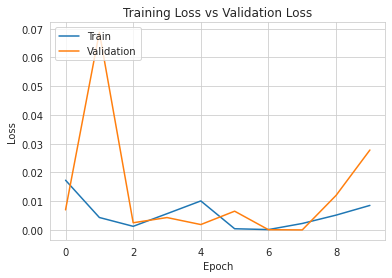

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [41]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Loss: " + str(score[0]))
print("Accuracy: " + str(score[1]*100) + "%")

Loss: 0.026330020278692245
Accuracy: 96.60493731498718%
